In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 1000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.0127728 ,  0.1310403 ,  0.23837069,  0.33634672,  0.42851773,
        0.52022696,  0.61741412,  0.72337723,  0.83214319,  0.92505288,
        0.98404634,  1.00737941,  1.00453079,  0.98509812,  0.95508492,
        0.91750491,  0.87355244,  0.82336402,  0.7664088 ,  0.70167136,
        0.62774467,  0.5429157 ,  0.44533435,  0.33337703,  0.20633975,
        0.06550732, -0.08470863, -0.23647925, -0.38021424, -0.50787091,
       -0.61556482, -0.70355403, -0.77437353, -0.83100379, -0.87587857,
       -0.91055095, -0.93567252, -0.95109713, -0.95604801, -0.9493407 ,
       -0.92964518, -0.89574182, -0.84671843, -0.78208768, -0.70186687,
       -0.6066975 , -0.49805892, -0.37853873, -0.25198358, -0.12325796,
        0.00256959,  0.12145317,  0.23149195,  0.33348361,  0.43079326,
        0.52863443,  0.63227844,  0.74259043,  0.84922445,  0.93206203,
        0.97830808,  0.99146831,  0.98182786,  0.95775878,  0.92407131,
        0.88301539,  0.83531916,  0.78080106,  0.71867323,  0.64

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.18846750e-01],
       [  2.00000000e+01,   4.83384222e-01],
       [  3.00000000e+01,   4.51294541e-01],
       [  4.00000000e+01,   3.50392312e-01],
       [  5.00000000e+01,   1.80954114e-01],
       [  6.00000000e+01,   1.19002916e-01],
       [  7.00000000e+01,   9.98966619e-02],
       [  8.00000000e+01,   6.89805001e-02],
       [  9.00000000e+01,   5.80052175e-02],
       [  1.00000000e+02,   3.88081968e-02],
       [  1.10000000e+02,   2.72250064e-02],
       [  1.20000000e+02,   1.86243150e-02],
       [  1.30000000e+02,   1.25858299e-02],
       [  1.40000000e+02,   8.33798945e-03],
       [  1.50000000e+02,   6.97205588e-03],
       [  1.60000000e+02,   5.56392595e-03],
       [  1.70000000e+02,   4.86959331e-03],
       [  1.80000000e+02,   4.32354677e-03],
       [  1.90000000e+02,   3.76959541e-03],
       [  2.00000000e+02,   2.74768611e-03],
       [  2.10000000e+02,   3.24924407e-03],
       [  2.20000000e+02,   2.73457076e-03],
       [  

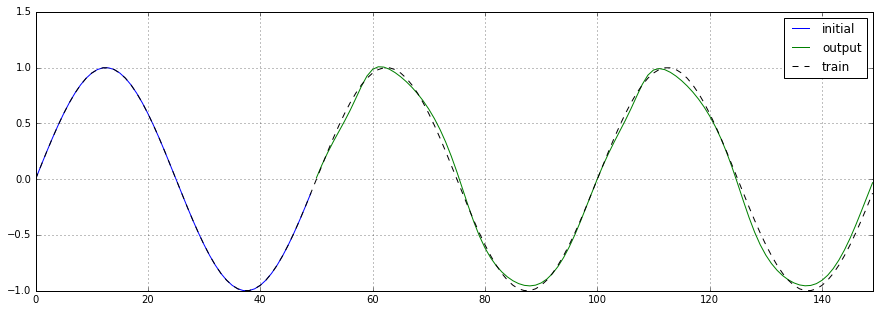

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

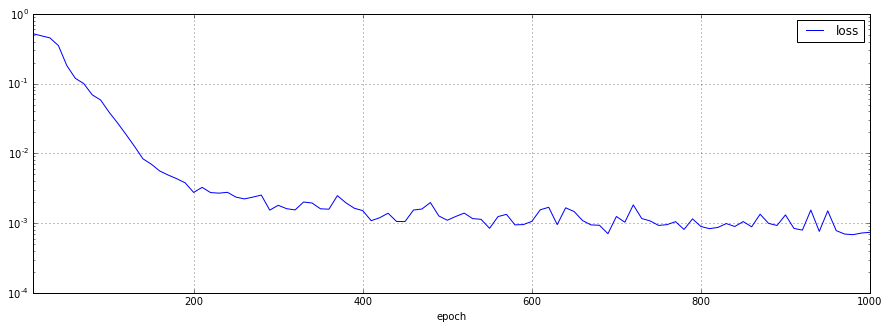

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")